In [8]:
import csv
import numpy as np
import math

In [9]:
# read file and store to numpy array
A = []
B = []
C = []
with open('data_minibatch.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        row = [float(x) for x in row]
        A.append(row[0])
        B.append(row[1])
        C.append(row[2])
A = np.array(A)
B = np.array(B)
C = np.array(C)

In [10]:
def f(x):
    return np.sum(A + (B * x) + (1/2 * (C * math.pow(x,2))))

In [11]:
def f_gradient(x):
    return np.sum(B + (C * x))

In [12]:
def f_hessian():
    return np.sum(C)

In [13]:
# 2.1 
# f(x) is Lipchitz continiously differentiable if L > 0
L = np.sum(C)
print('L: {:.3f}'.format(L))
if L > 0:
    print('f(x) is Lipchitz continiously differentiable')
print('Range of step size: 0 < t < {:.3f}\n'.format(2/L))

# find x*, p*
x_opt = -np.sum(B)/np.sum(C)
print('x* is {:.3f} (hessian of f(x*) = {:.3f})'.format(x_opt, f_hessian()))
p_opt = f(x_opt)
print('p* is {:.3f}'.format(p_opt))

L: 166.644
f(x) is Lipchitz continiously differentiable
Range of step size: 0 < t < 0.012

x* is -0.115 (hessian of f(x*) = 166.644)
p* is -0.441


In [14]:
# f_i for mini batch
def f_i(x, i):
    return A[i] + (B[i] * x) + (1/2 * (C[i] * math.pow(x,2)))
def f_i_gradient(x,i):
    return B[i] + (C[i] * x)

In [61]:
def mini_batch(N,k,t):
    epoch = N//k
    print('epoch:',epoch)
    # initial x0
    x = -0.2   
    f_hist = []
    i = 0
    for e in range(epoch):
        for j in range(k):
            x = x - (t * (f_i_gradient(x, i)))
            i += 1
        f_hist.append(f(x))    
    return f_hist


epoch: 200


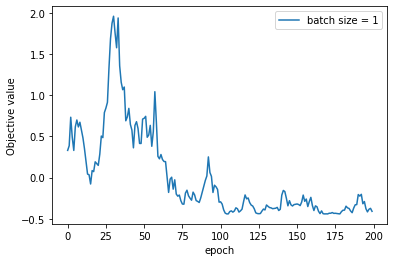

In [62]:
N = A.shape[0]
k = 1 #batch_size
f_hist_1 = mini_batch(N,k, 0.01)
# output
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(f_hist_1))], f_hist_1, label='batch size = 1')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

epoch: 10


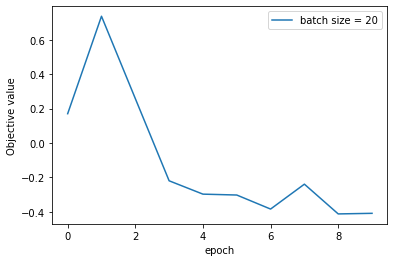

In [63]:
N = A.shape[0]
k = 20 #batch_size
f_hist_1 = mini_batch(N,k, 0.01)
# output
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(f_hist_1))], f_hist_1, label='batch size = 20')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

epoch: 4


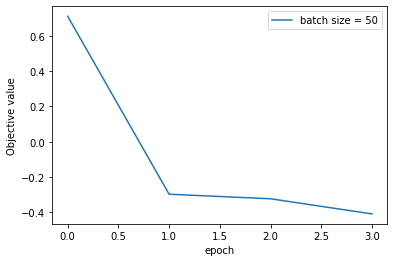

In [64]:
N = A.shape[0]
k = 50 #batch_size
f_hist_1 = mini_batch(N,k, 0.01)
# output
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(f_hist_1))], f_hist_1, label='batch size = 50')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

epoch: 200


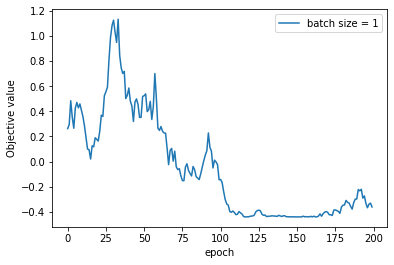

In [65]:
N = A.shape[0]
k = 1 #batch_size
f_hist_1 = mini_batch(N,k, 1/L)
# output
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(f_hist_1))], f_hist_1, label='batch size = 1')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

epoch: 10


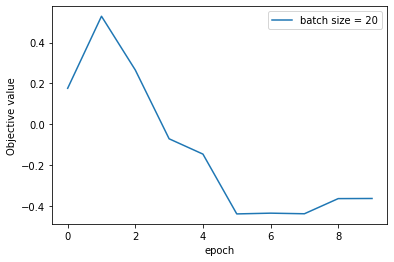

In [66]:
N = A.shape[0]
k = 20 #batch_size
f_hist_1 = mini_batch(N,k, 1/L)
# output
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(f_hist_1))], f_hist_1, label='batch size = 20')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()

epoch: 4


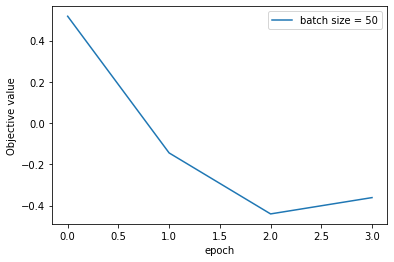

In [67]:
N = A.shape[0]
k = 50 #batch_size
f_hist_1 = mini_batch(N,k, 1/L)
# output
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(f_hist_1))], f_hist_1, label='batch size = 50')
plt.xlabel("epoch")
plt.ylabel("Objective value")
plt.legend(loc='upper right')
plt.show()